<a href="https://colab.research.google.com/github/mmarushika/sdc-lab/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model loaded successfully!


Saving Pug_600.jpg to Pug_600.jpg
Loaded image: Pug_600.jpg


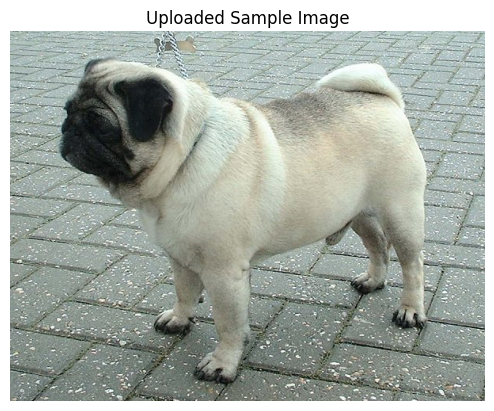

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Top predictions:
pug: 90.07%
Brabancon_griffon: 0.51%
Norwegian_elkhound: 0.40%


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError
from google.colab import files

# Load the pre-trained MobileNetV2 model (weights downloaded automatically)
model = MobileNetV2(weights='imagenet')
print("Model loaded successfully!")

# Upload an image from your local machine
uploaded = files.upload()  # A file chooser will appear in Colab

if uploaded:
    image_filename = list(uploaded.keys())[0]
    try:
        img = Image.open(image_filename)
        print(f"Loaded image: {image_filename}")
    except UnidentifiedImageError as e:
        print("Error: Could not identify the image. It might be in an unsupported format.")
        raise e
else:
    raise ValueError("No image was uploaded.")

# Display the image
plt.imshow(img)
plt.title("Uploaded Sample Image")
plt.axis('off')
plt.show()

# Preprocess the image:
img_resized = img.resize((224, 224))
img_array = image.img_to_array(img_resized)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Run prediction on the image
predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Print the top 3 predictions
print("Top predictions:")
for class_id, class_name, score in decoded_predictions:
    print(f"{class_name}: {score*100:.2f}%")
from google.colab import files

# Prompt to upload an image file from your local machine
uploaded = files.upload()  # A file chooser will appear in Colab

if uploaded:
    image_filename = list(uploaded.keys())[0]
    img = Image.open(image_filename)
    print(f"Loaded image: {image_filename}")
else:
    raise ValueError("No image was uploaded.")
